In this series, I will talk about training a simple neural network on image data. To give a brief overview, neural networks is a kind of supervised learning. By this I mean, the model needs to train on historical data to understand the relation between input variables and target variables. Once trained, the model can be used to predict target variable on new input data. In the previous posts, we have written about [linear](https://wp.me/p9ttN2-4), [lasso and ridge](https://wp.me/p9ttN2-1B) regression. All those methods comes under supervised learning. But what is special about neural networks is, it works really well for image, audio, video and language datasets. A multi layer neural network and its variations are commonly called deep learning. 

In this blog I will focus on handling and processing the image data. In the next blog, I will show how to train the model. I will use python for implementation as python as many useful functions for image processing.  If you are new to python, I recommend you to quickly take a numpy (till array manipulation) and matplotlib tutorial.

Main contents of this article:

a) Exploring image dataset: Reading images, printing image arrays and actual images, decomposing images into different color channels

b) Cropping and Resizing images: Cropping rectangle images to a square, resizing high resolution images to a lower resolution for easier processing, creating gray scale images from color images and standardizing image data

c) Colormapping and Interpolation: Converting no color channel images to color images using different themes. Interpolating after resizing or reducing resolution of images to for retaining quality and information.

d) Montage Creation and Preparing image data for modeling



Okay! Let's get started. First let's get some data set.This data is shared in the course on kadanze about Creative Applications of Deeplearning by Parag Mital. This data contains pictures of celebrities. Original source can be found here along with some description http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html.

In the original dataset, there are around 200,000 pictures. For the purpose of this blog we will use 100 images. Following code will download 100 images.

In [2]:
# Load the os library
import os
import numpy as np

# Load the request module
import urllib.request

if not os.path.exists('img_align_celeba'):
    
    # Create a directory
    os.mkdir('img_align_celeba')

    # Now perform the following 10 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))
else:
    print('Celeb Net dataset already downloaded')

Celeb Net dataset already downloaded


In [3]:
files = [os.path.join('img_align_celeba', file_i)
 for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i]

Let's add a target column. Here we will try to identify whether a picture shows a male celebrity or female celebrity. Value 1 denotes 'Female celebrity' and 0 denotes 'male celebrity'.

In [3]:
y=np.array([1,1,0,1,1,1,0,0,1,1,1,0,0,1,0,0,1,1,1,0,0,1,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1])
y=y.reshape(1,y.shape[0])
classes=np.array(['Male', 'Female'])

In [4]:
y_train=y[:,:80]
y_test=y[:,80:]

Now let's take a closer look at our data set. For this we will use the matplotlib library for plotting. We can also use it to view the images in our data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

<a name="Exploring images"></a>
## Exploring image dataset

In this section we will try to understand our image data better. Let's plot an image from the data set(in this case the first image)

In [6]:
plt.imread(files[0])

array([[[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [247, 226, 225],
        [254, 238, 222],
        [254, 238, 222]],

       [[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [249, 228, 225],
        [254, 238, 222],
        [254, 238, 222]],

       [[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [250, 231, 227],
        [255, 239, 223],
        [255, 239, 223]],

       ..., 
       [[140,  74,  26],
        [116,  48,   1],
        [146,  78,  33],
        ..., 
        [122,  55,  28],
        [122,  56,  30],
        [122,  56,  30]],

       [[130,  62,  15],
        [138,  70,  23],
        [166,  98,  53],
        ..., 
        [118,  49,  20],
        [118,  51,  24],
        [118,  51,  24]],

       [[168, 100,  53],
        [204, 136,  89],
        [245, 177, 132],
        ..., 
        [118,  49,  20],
        [120,  50,  24],
        [120,  50,

It prints some numbers. Here each tuple (the innermost array) represents a pixel. As you can see, it has 3 values, one corresponding to each color channel, RGB (Red, Green Blue). To view the data as image, we have to use 'imshow' function

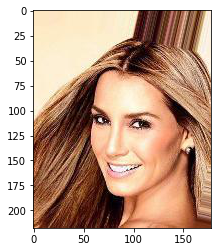

In [5]:
img = plt.imread(files[0])
plt.imshow(img)

In [8]:
plt.imsave(arr=img, fname="img1.png")

Let's see the shape(dimensions) of the image

In [9]:
img.shape

(218, 178, 3)

This means height of the image is 218 pixels,width 178 pixels and each pixel has 3 color channels(RGB). We can view the image using each of the color channels

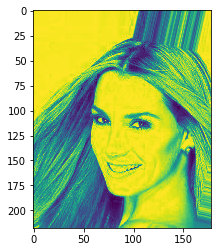

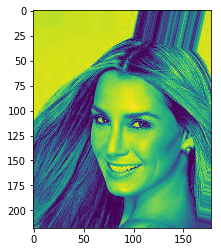

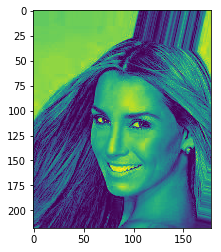

In [10]:
plt.figure()
plt.imshow(img[:, :, 0])
plt.figure()
plt.imshow(img[:, :, 1])
plt.figure()
plt.imshow(img[:, :, 2])

In [11]:
plt.imsave(arr=img[:, :, 0], fname="img2.png")
plt.imsave(arr=img[:, :, 1], fname="img3.png")
plt.imsave(arr=img[:, :, 2], fname="img4.png")

<a name="Cropping and resizing images"></a>
## Cropping and resizing images

For many of the deeplearning and image processing applications, we will need to crop the image to a square and resize it for faster processing. The following function will crop any rectangle image(height != width) to a square image

In [10]:
def imcrop_tosquare(img):
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1]) // 2
        crop = img[extra:-extra, :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0]) // 2
        crop = img[:, extra:-extra]
    else:
        crop = img
    return crop

Now we will resize the image to 64 by 64 pixels(height=64,width=64). For resizing, we can use the imresize function from scipy

In [7]:
from scipy.misc import imresize

(64, 64, 3)


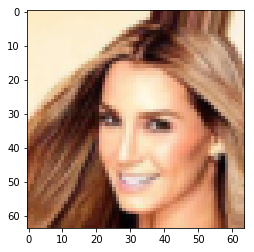

In [11]:
square = imcrop_tosquare(img)
rsz = imresize(square, (64, 64))
plt.imshow(rsz)
print(rsz.shape)

In [15]:
plt.imsave(arr=rsz, fname="img5.png")

As we can see from the shape of the image, it has been resized to (64,64,3). If we take the mean of each color channels(RGB), we will get a grayscale image.

(64, 64)


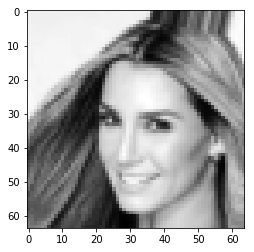

In [12]:
mean_img = np.mean(rsz, axis=2)
print(mean_img.shape)
plt.imshow(mean_img, cmap='gray')

In [13]:
mean_img.shape

(64, 64)

<a name="Colormapping and interpolating images"></a>
## Colormapping and interpolating images
When there is no color channel for an image, you can use different availble color maps provided by matplotlib. Following code iterates through different color maps for the above image(with no color channel) and plots it. For your purposes, you can choose the best one if you come across such images. It is also an easy way to convert grayscale images to color.

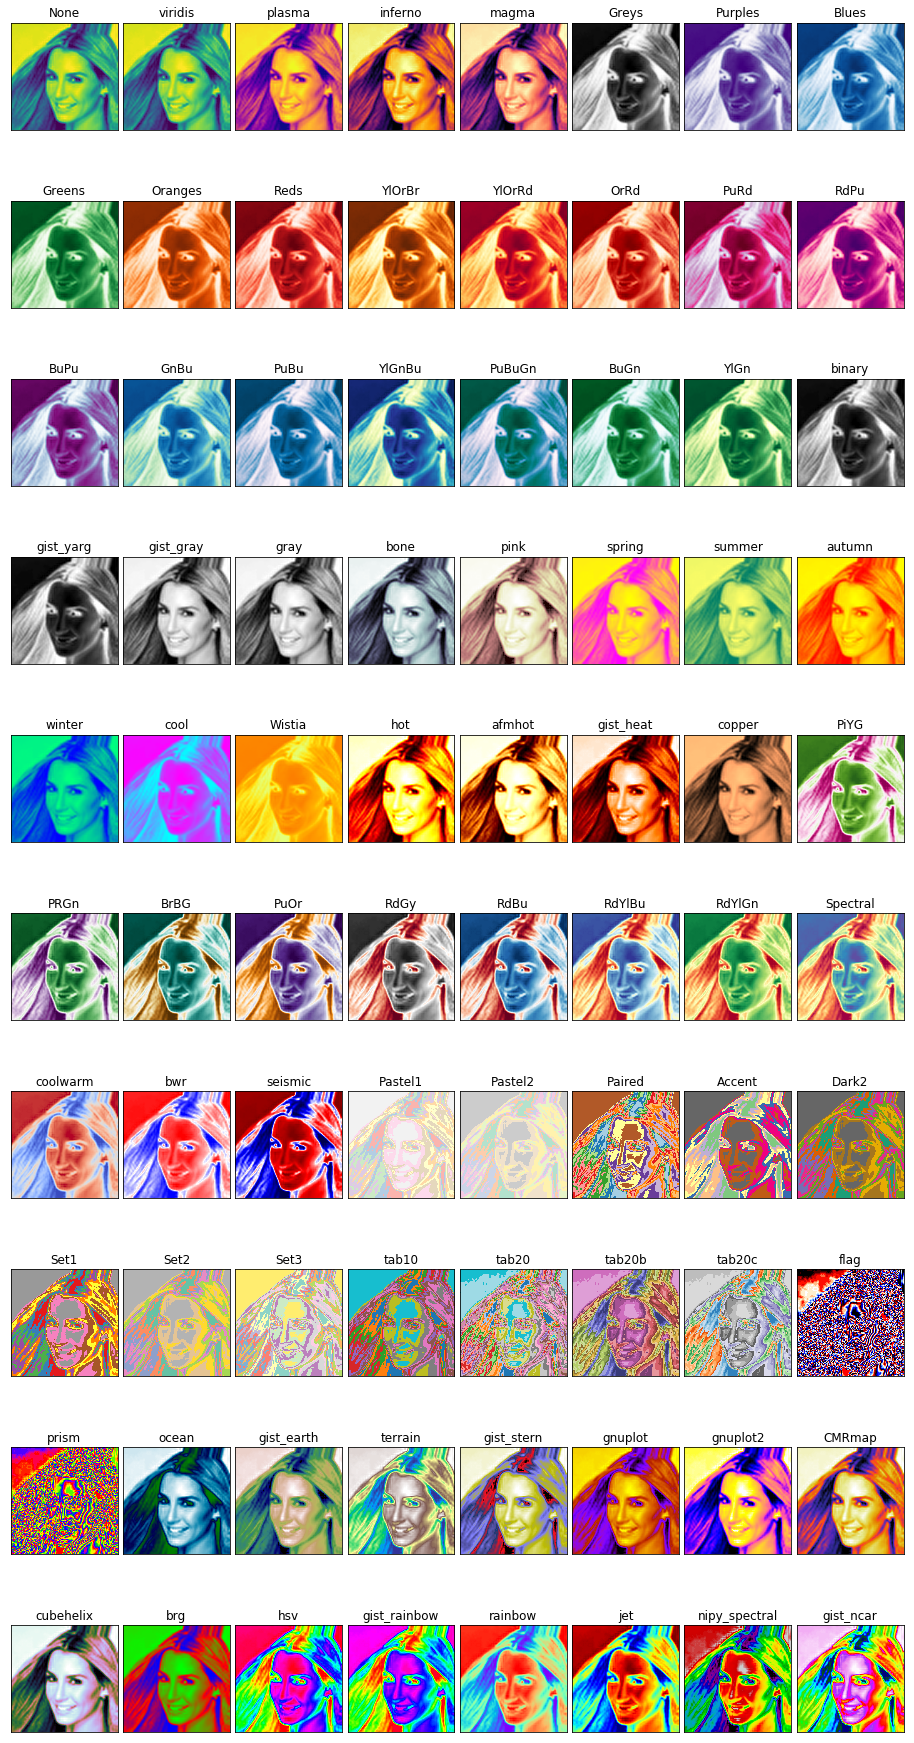

In [17]:
methods = [None,'viridis', 'plasma', 'inferno', 'magma','Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
          'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper','PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu','RdYlBu', 'RdYlGn', 
           'Spectral', 'coolwarm', 'bwr', 'seismic','Pastel1', 'Pastel2', 'Paired', 'Accent','Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c','flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern','gnuplot', 
           'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv','gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar']

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, axes = plt.subplots(10, 8, figsize=(16, 32),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(mean_img, interpolation='sinc',cmap=interp_method)
    ax.set_title(interp_method)

plt.show()

In [18]:
plt.imsave(arr=mean_img, fname="img6.png", cmap='gray')

Now let's crop all the rectangle images as square and resize all the images in the dataset to size 64, 64, 3.

In [19]:
imgs = []
for file_i in files:
    img = plt.imread(file_i)
    square = imcrop_tosquare(img)
    rsz = imresize(square, (64, 64))
    imgs.append(rsz)
print(len(imgs))

100


Let's combine all the images into a variable

In [20]:
data = np.array(imgs)

If you are familiar with machine learning, you will know the about data standardization. It means generally bringing down the range of an input variable. Same can be done with image data as well. However, for images there is an easy way to standardize. We can simply divide each of the values by 255, as each pixel can have values from 0-255. This will change the scale from 0-255 to 0-1. This will make sure while taking exponents in logistic regression, we won't overflow the system.

In [21]:
data=data/255

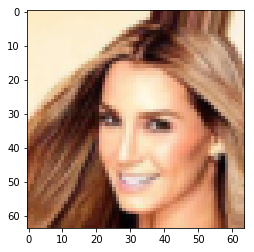

In [22]:
plt.imshow(data[0])

When we reduce the resolution, we lose some information. We can use different kinds of interpolation to overcome this. The following code shows the effect of different kinds of interpolation. While plotting images after resizing, you can choose any interpolation you like.

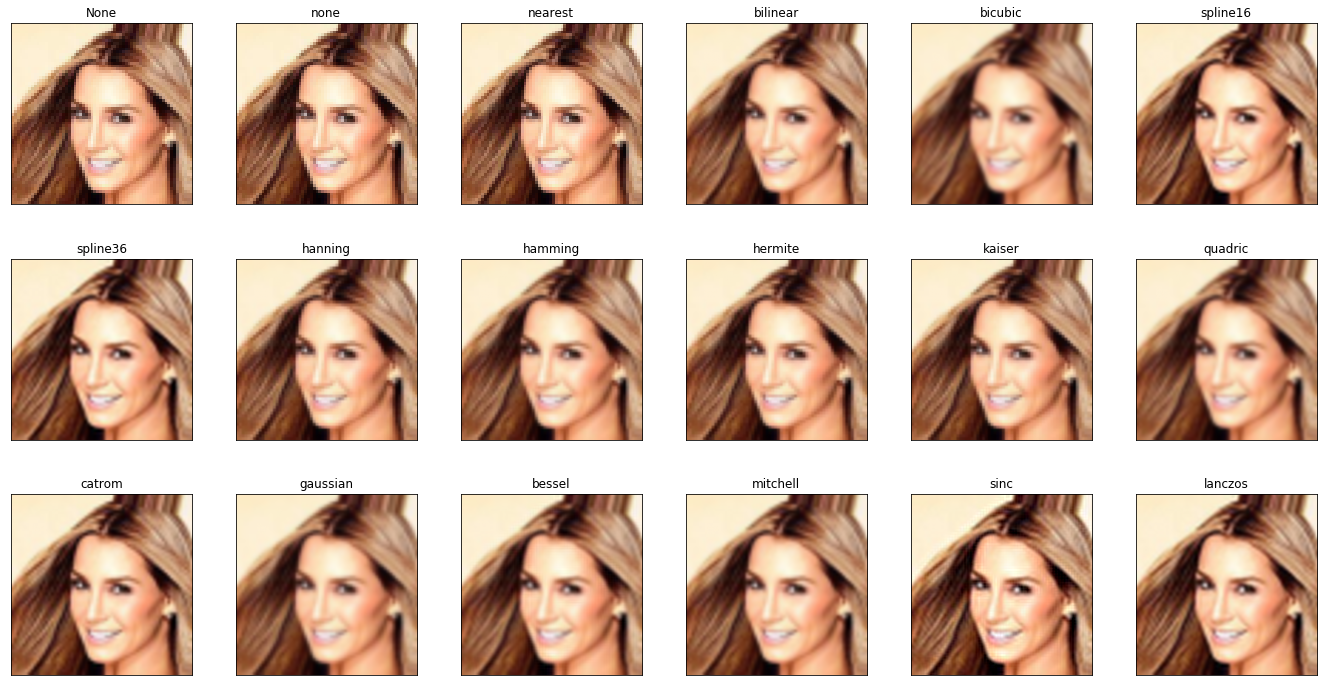

In [38]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, axes = plt.subplots(3, 6, figsize=(24, 12),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(data[0], interpolation=interp_method, cmap=None)
    ax.set_title(interp_method)

plt.show()

In [24]:
plt.imsave(arr=data[0], fname="img7.png")

In [25]:
data.shape

(100, 64, 64, 3)

Shape of the data is 100,64,64,3. This means there are 100 images of size(64,64,3)

<a name="Montage creation"></a>
## Montage creation

Till now we have been inspecting one image at a time. To view all images, we can use the following function to create a montage of all the images

In [26]:
def montage(images, saveto='montage.png'):
    """Draw all images as a montage separated by 1 pixel borders.
    Also saves the file to the destination specified by `saveto`.
    Parameters
    ----------
    images : numpy.ndarray
        Input array to create montage of.  Array should be:
        batch x height x width x channels.
    saveto : str
        Location to save the resulting montage image.
    Returns
    -------
    m : numpy.ndarray
        Montage image.
    """
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    if len(images.shape) == 4 and images.shape[3] == 3:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1, 3)) * 0.5
    else:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1)) * 0.5
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                m[1 + i + i * img_h:1 + i + (i + 1) * img_h,
                  1 + j + j * img_w:1 + j + (j + 1) * img_w] = this_img
    plt.imsave(arr=m, fname=saveto)
    return m

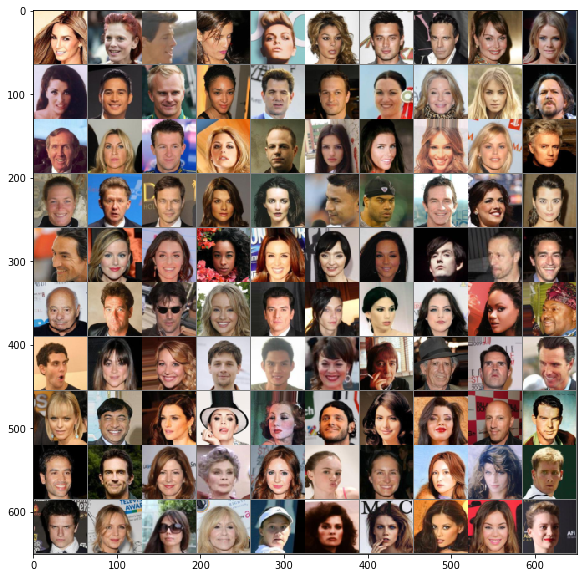

In [44]:
plt.figure(figsize=(10, 10))
plt.imshow(montage(data,saveto='montage.png'))

<a name="Data preparation for modeling "></a>
## Data Preparation for modeling

Let's split the data into train and test. Train data will be used to train the model. Then we will predict on test data to check the accuracy of the trained model

In [28]:
train_x_orig=data[:80,:,:,:]
test_x_orig=data[80:,:,:,:]

Unlike [regression model](https://wp.me/p9ttN2-4), logistic regression is used to predict a binomial variable.i.e means a variable which takes only two values. This suits perfectly for us as we are trying to predict from the images whether it is a male or female celebrity.

In [29]:

m_train = train_x_orig.shape[0]
m_test = y_test.shape[1]
num_px = train_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x shape: " + str(train_x_orig.shape))
print ("y_train shape: " + str(y_train.shape))
print ("test_x shape: " + str(test_x_orig.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: m_train = 80
Number of testing examples: m_test = 20
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_x shape: (80, 64, 64, 3)
y_train shape: (1, 80)
test_x shape: (20, 64, 64, 3)
y_test shape: (1, 20)


For the purpose of training, we have to reshape our data or flatten our data. After flattening, shape of our data should become (height \* width \* 3, number of examples). After flattening, every column will represent an image.

In [30]:
train_x = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x = test_x_orig.reshape(test_x_orig.shape[0],-1).T

In [31]:
print ("train_x flatten shape: " + str(train_x.shape))
print ("test_x flatten shape: " + str(test_x.shape))

train_x flatten shape: (12288, 80)
test_x flatten shape: (12288, 20)


Now we have our data set ready. In the next part I will talk about how to train the model using simple logistic regression using gradient descent. Meanwhile If you want to know more about gradient descent check it out [here](https://wp.me/p9ttN2-P)

References: 'Creative Applications of Deep Learning with Tensorflow' on Kadenze by Parag Mital<br>
            'Neural Networks and Deep Learning' on Coursera by Andrew Ng